# Analyzing FIFA world cup data

<p>This workbook contains a small analysis of the fifa world cup data since 1930.</p>
<p>I am going to look over the results to find out the most cups won by any country, most games played, most goals scored etc.</p>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
matches = pd.read_csv("WorldCupMatches.csv")
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [46]:
#Let's look at the size of the dataset
matches.shape

(4572, 20)

In [47]:
players = pd.read_csv("WorldCupPlayers.csv")
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [48]:
#Size of the players dataset
players.shape

(37784, 9)

In [49]:
wc = pd.read_csv("WorldCups.csv")
wc.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [50]:
#Size of wc dataset
wc.shape

(20, 10)

Let's start with the smallest datasets - worldcups (wc)

In [51]:
wc=wc.set_index('Year')
wc.head()

,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Year,,,,,,,,,
1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


#### World Cup Winners

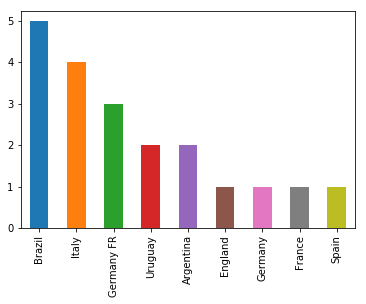

In [52]:
wc["Winner"].value_counts().plot.bar()

Brazil seems to have won the highest number of fifa world cups to date. 

Out of the 20 worldcups, 3 of them won 12 (60%): Brazil, Italy and Germany. A total of 9 countries have ever won any of the world cup.


In [53]:
wc["Runners-Up"].value_counts()

Netherlands       3
Argentina         3
Germany FR        3
Brazil            2
Hungary           2
Italy             2
Czechoslovakia    2
Sweden            1
Germany           1
France            1
Name: Runners-Up, dtype: int64

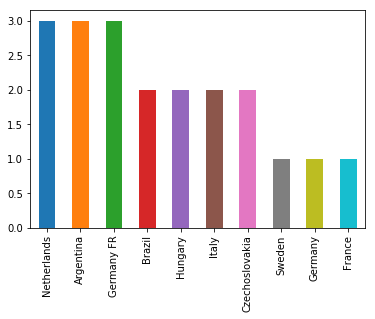

In [54]:
wc["Runners-Up"].value_counts().plot.bar()

#### Let's now look at the goals scored in every world cup

In [55]:
wc['GoalsScored']

Year
1930     70
1934     70
1938     84
1950     88
1954    140
1958    126
1962     89
1966     89
1970     95
1974     97
1978    102
1982    146
1986    132
1990    115
1994    141
1998    171
2002    161
2006    147
2010    145
2014    171
Name: GoalsScored, dtype: int64

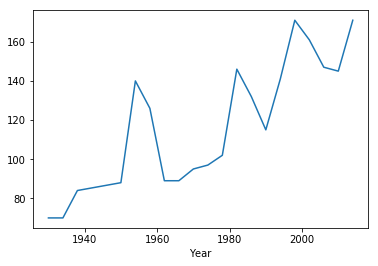

In [56]:
wc['GoalsScored'].plot.line()

In [57]:
(wc['GoalsScored']/wc['MatchesPlayed'])

Year
1930    3.888889
1934    4.117647
1938    4.666667
1950    4.000000
1954    5.384615
1958    3.600000
1962    2.781250
1966    2.781250
1970    2.968750
1974    2.552632
1978    2.684211
1982    2.807692
1986    2.538462
1990    2.211538
1994    2.711538
1998    2.671875
2002    2.515625
2006    2.296875
2010    2.265625
2014    2.671875
dtype: float64

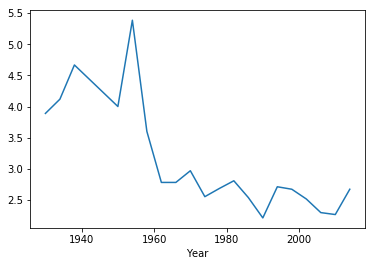

In [58]:
(wc['GoalsScored']/wc['MatchesPlayed']).plot.line()

The highest number of goals were scored in 1998 and 2014 with 171 goals, while the goals per match were highest in the 1954. 

The general trend of total goals per match seems to indicate defence getting stronger as time passes. 

In [59]:
wc['Attendance']=wc['Attendance'].str.replace(".","").astype(int)
wc['Attendance']

Year
1930     590549
1934     363000
1938     375700
1950    1045246
1954     768607
1958     819810
1962     893172
1966    1563135
1970    1603975
1974    1865753
1978    1545791
1982    2109723
1986    2394031
1990    2516215
1994    3587538
1998    2785100
2002    2705197
2006    3359439
2010    3178856
2014    3386810
Name: Attendance, dtype: int32

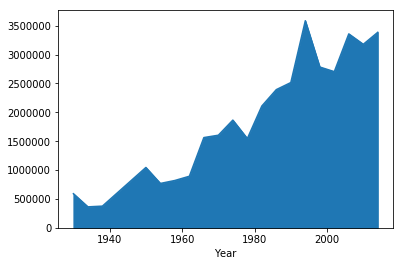

In [60]:
wc['Attendance'].plot.area()

In [61]:
wc[wc['Attendance']==wc['Attendance'].max()]

,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Year,,,,,,,,,
1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538


The highest attendance ever recorded was 3.58 million and the host country was USA. The winner was Brazil and Italy came second.

#### Matches data


In [62]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [63]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

Match data exists only in the first 852 rows, the rest contain only missing data.

In [64]:
matches = matches[:852]

In [65]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtypes:

##### Let's look at the total goals by every country ever participated in the worldcup.

Text(0.5,1,'Total Goals Scored')

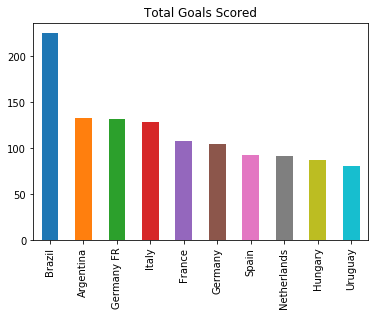

In [66]:
home_team_goals = matches.groupby('Home Team Name')['Home Team Goals'].agg(sum)
away_team_goals = matches.groupby('Away Team Name')['Away Team Goals'].agg(sum)

team_goals = home_team_goals+away_team_goals
team_goals.sort_values(ascending = False).head(10).plot.bar()
plt.title("Total Goals Scored")

Since the total goals by itself won't make much sense, let's calculate the goals per match.

Text(0.5,1,'Total Matches played')

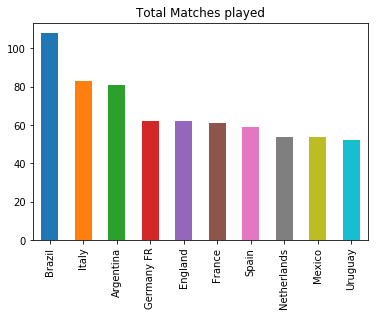

In [67]:
#total matches played by each team
home_team_match_count = matches.groupby('Home Team Name').size()
away_team_match_count = matches.groupby('Away Team Name').size()
matches_count = home_team_match_count+away_team_match_count
matches_count.sort_values(ascending=False).head(10).plot.bar()
plt.title("Total Matches played")

Text(0.5,1,'Total Goals per Match played')

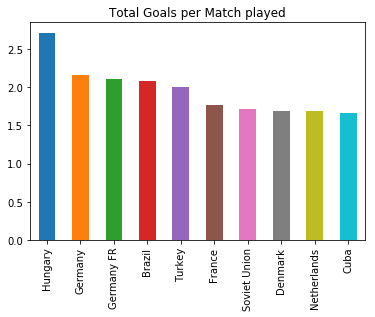

In [68]:
(team_goals/matches_count).sort_values(ascending=False).head(10).plot.bar()
plt.title("Total Goals per Match played")

Although brazil had the highest goals scored and highest matches played, it did not have the highest goals per match played.
Hungary has the highest goals per match at 2.7, followed by germany and brazil.

##### Let's look at how the city/country the game's played influenced the attendance count

In [69]:
city_attendance = matches.groupby('City')['Attendance'].agg(sum)
city_matches = matches.groupby('City').size()
#attendance per match
(city_attendance/city_matches).sort_values(ascending=False).head(10)

City
Mexico City             93806.521739
Los Angeles             92600.875000
Rio De Janeiro          86417.333333
London                  82369.600000
San Francisco           81737.333333
Saint-Denis             78222.222222
New York/New Jersey     73689.714286
Berlin                  71500.000000
Detroit                 70899.500000
Johannesburg            69580.133333
dtype: float64

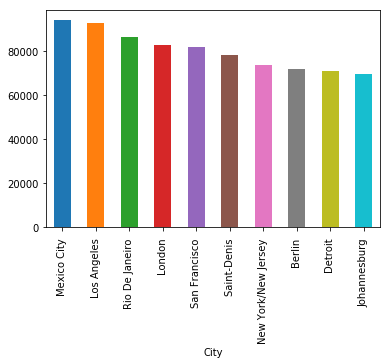

In [70]:
(city_attendance/city_matches).sort_values(ascending=False).head(10).plot.bar()

Highest attendance per game happened in Mexico City due to either higher capacity or more people follow the game.

Let's look at the number of stadiums used in every city.

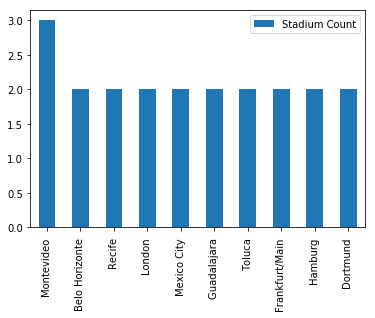

In [71]:
stadiums = matches[['City','Stadium']]
unique_cities = list(stadiums['City'].unique())
stadiums_count=[]
for city in unique_cities:
    stadiums_count.append(stadiums[stadiums['City']==city]['Stadium'].nunique())
    
sum(stadiums_count)
stadium_count_df = pd.DataFrame(stadiums_count,unique_cities,columns=['Stadium Count'])
stadium_count_df.sort_values('Stadium Count', ascending=False).head(10).plot.bar()

Montevideo is the only city with 3 stadiums used for worldcups